<a href="https://colab.research.google.com/github/subhra-15/Introduction-to-Machine-Learning/blob/master/Linear%20Regression/2_Introduction_to_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Internshala Machine learning/Notebooks/Module 5/Transformed_Housing_Data2[1].csv')
df.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [2]:
# Extracting 30 rows of Sale_Price and Flat_area and putting it in the sample data
Sale_Price=df['Sale_Price'].head(30)
flat_area= df['Flat Area (in Sqft)'].head(30)
Sample_data=pd.DataFrame({'Sale_Price':Sale_Price,'flat_area':flat_area})
Sample_data

,Sale_Price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


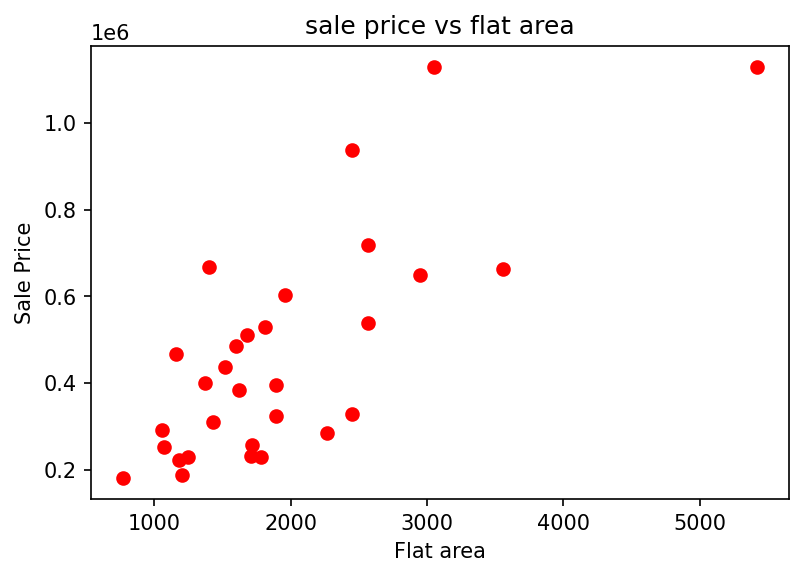

In [3]:
#plotting a scatter plot between flat area and sale price
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.scatter(Sample_data.flat_area,Sample_data.Sale_Price,color='red')
plt.xlabel('Flat area')
plt.ylabel('Sale Price')
plt.title('sale price vs flat area')
plt.show()



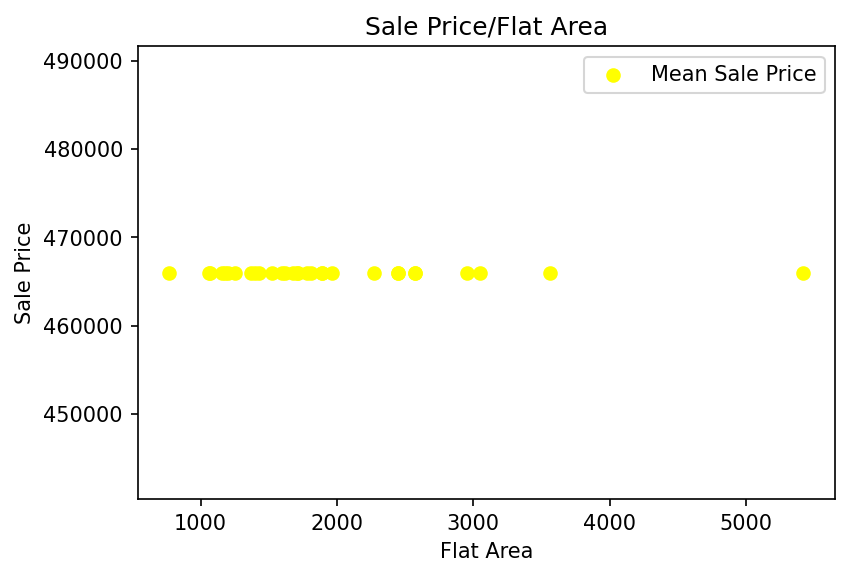

In [4]:
# the first and the most basic model is the mean regression model which is as fallow

Sample_data['mean_sale_price']=Sample_data.Sale_Price.mean()

#plotting a scatter plot

plt.figure(dpi=150)
plt.scatter(Sample_data.flat_area,Sample_data.mean_sale_price,color='yellow',label='Mean Sale Price')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title('Sale Price/Flat Area')
plt.legend()
plt.show()



The mean regression model says that every new house listed would have the same price irrespective of the flat area which is not correct

as the mean regression model fails the better way is to use linear regression model

**Linear Regression Model**: It model the linear relationship between the independent and dependent variable

The best linear regression model is the one which have the least error 

Equation of a straight line :
                            Y=mx+C
                            Y: dependent variable
                            x: independent variable
                            m: slope
                            C: intercept

the slope and the intercept are known as the parameter of the line

**Change in C value keeping m constant**

As the value of c increases the line shifts upward but the angle of the line doesn't changes

**Change in the value of m keeping C constant**

As the value of m increases the rate at which the value of Y changes with respect to x also increases



# **Cost Function Curve**

Text(0.5, 1.0, 'slope 0 with MSE 281372081125.0')

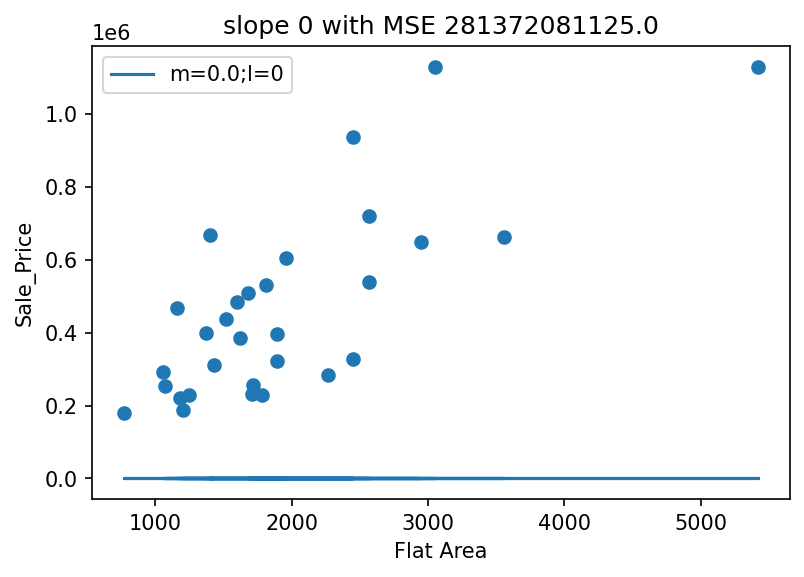

In [13]:
c=0 #intercept intialization
m=0 # slope initializtion
line=[]

for i in range (len(Sample_data)):
  line.append(Sample_data.flat_area[i]*m+c)

plt.figure(dpi=150)
plt.scatter(Sample_data.flat_area,Sample_data.Sale_Price)

plt.plot(Sample_data.flat_area,line,label='m=0.0;l=0')
plt.xlabel('Flat Area')
plt.ylabel('Sale_Price')
plt.legend()

#calculating MSE
from sklearn.metrics import mean_squared_error as mse
MSE= mse(Sample_data.Sale_Price,line)
plt.title("slope "+str(m)+' with MSE '+str(MSE))

the line that we made from the data is very bad and have a very bad MSE

Lets change the slope to m=50 and c=0 

In this line is able to fit the data better than the previous model but still the model is very poor as MSE is very large



Text(0.5, 1.0, 'slope 50 with MSE 184728400708.33334')

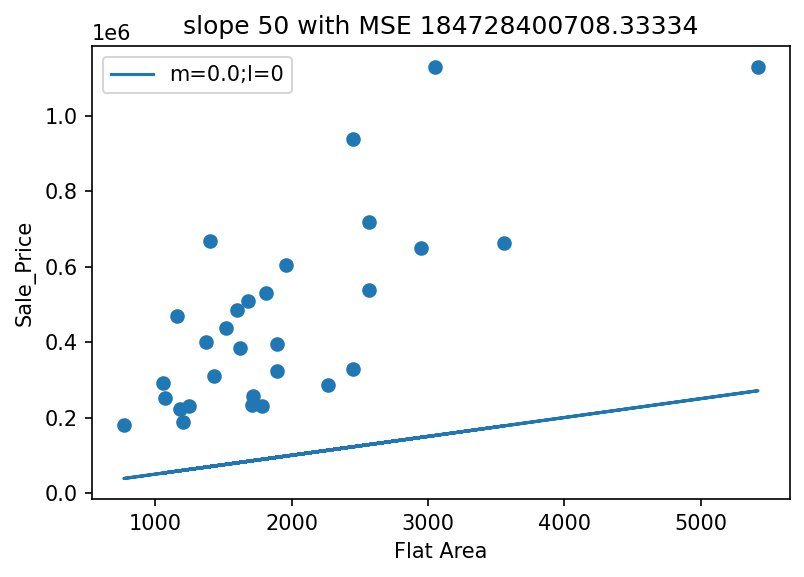

In [15]:
c=0 #intercept intialization
m=50 # slope initializtion
line=[]

for i in range (len(Sample_data)):
  line.append(Sample_data.flat_area[i]*m+c)

plt.figure(dpi=150)
plt.scatter(Sample_data.flat_area,Sample_data.Sale_Price)

plt.plot(Sample_data.flat_area,line,label='m=0.0;l=0')
plt.xlabel('Flat Area')
plt.ylabel('Sale_Price')
plt.legend()

#calculating MSE
from sklearn.metrics import mean_squared_error as mse
MSE= mse(Sample_data.Sale_Price,line)
plt.title("slope "+str(m)+' with MSE '+str(MSE))

Determine the slope of the line is very tedious task lets automate this process

In [34]:
def slope_Error (slope,intercept,sample_data):
  Sale=[]
  for i in range (len(sample_data.flat_area)):
    tmp=(sample_data.flat_area[i]*slope)+intercept
    Sale.append(tmp)

  MSE=mse(sample_data.Sale_Price,Sale)
  return MSE

In [36]:
slope=[i/10 for i in range(0,5000)]
cost=[]

for i in slope:
  cst=slope_Error(slope=i,intercept=0,sample_data=Sample_data)
  cost.append(cst)

# arranging the dataframe

Cost_table=pd.DataFrame({
    'slope':slope,
    'cost': cost
})
Cost_table.head()

,slope,cost
0,0.0,2.813721e+11
1,0.1,2.811558e+11
2,0.2,2.809395e+11
3,0.3,2.807234e+11
4,0.4,2.805073e+11


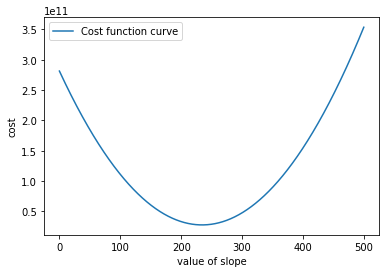

In [37]:
#plotting the cost value corresponding to every value of slope

plt.plot(Cost_table.slope,Cost_table.cost,label='Cost function curve')
plt.xlabel('value of slope')
plt.ylabel('cost')
plt.legend()

the curve is called cost function curve or loss function curve is the error corresponding to different model


 **Convex curve**:


1.   The convex curve have minimum value at cerrtain point 
2.   The value of the curve increases in both side of the curve
3.   In convex curve there is only one point that is minimum it is called Global Minimum

**Non Convex Curve**: This have two or more minima available

